Importing the Dependencies

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Data Collection

In [83]:
# loading the dataset to a Pandas DataFrame
wine_dataset = pd.read_csv('/content/drive/MyDrive/Copy of PS_dataset.csv')

In [84]:
# number of rows and column in the dataset
wine_dataset.shape

(1599, 12)

In [85]:
# first 5 rows & columns in the dataset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [86]:
# checking for missing values
wine_dataset.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,111
residual sugar,111
chlorides,111
free sulfur dioxide,0
total sulfur dioxide,0
density,111
pH,111
sulphates,0


Data Analysis and Visualization

In [87]:
# statistical measures of the dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1488.000000,1488.000000,1488.000000,1599.000000,1599.000000,1488.000000,1488.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.271015,2.522883,0.087022,15.874922,46.467792,0.996748,3.311499,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.193989,1.374405,0.046114,10.460157,32.895324,0.001893,0.154092,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996755,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


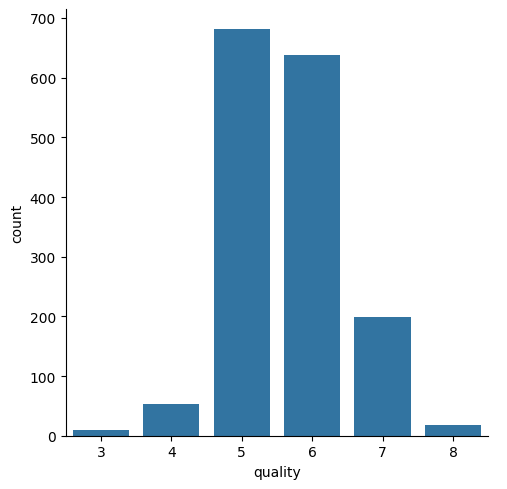

In [88]:
# number of values for each quality
sns.catplot(x='quality', data = wine_dataset, kind = 'count')

<Axes: xlabel='alcohol', ylabel='pH'>

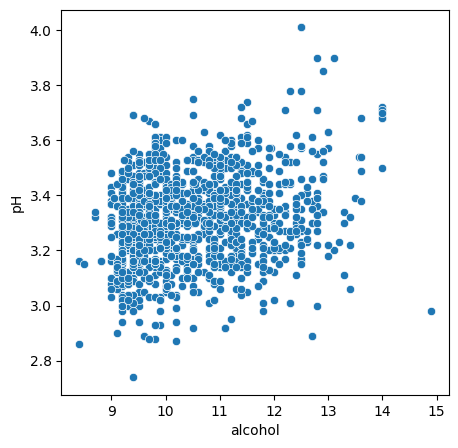

In [89]:
# alcohol vs pH
plot = plt.figure(figsize=(5,5))
sns.scatterplot(x='alcohol', y = 'pH', data = wine_dataset)

<Axes: xlabel='alcohol', ylabel='Count'>

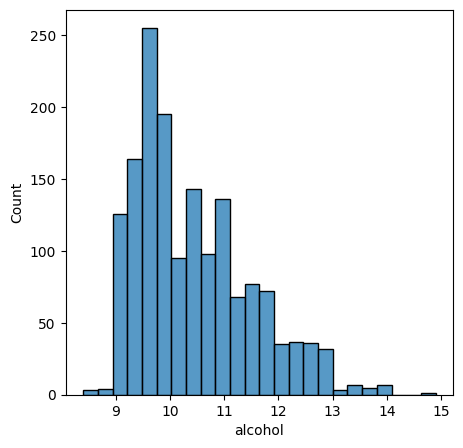

In [90]:
# distribution of alcohol
plot = plt.figure(figsize=(5,5))
sns.histplot(wine_dataset['alcohol'])

<Axes: xlabel='quality', ylabel='residual sugar'>

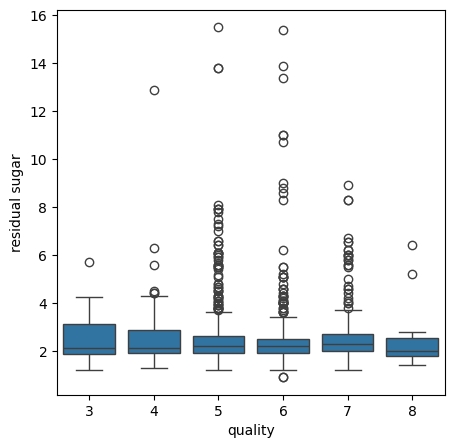

In [91]:
# residual sugar vs quality score
plot = plt.figure(figsize=(5,5))
sns.boxplot(x='quality', y = 'residual sugar', data = wine_dataset)

Correlation
 1. Positive Correlation
 2. Negative Correlation


In [92]:
correlation = wine_dataset.corr()

<Axes: >

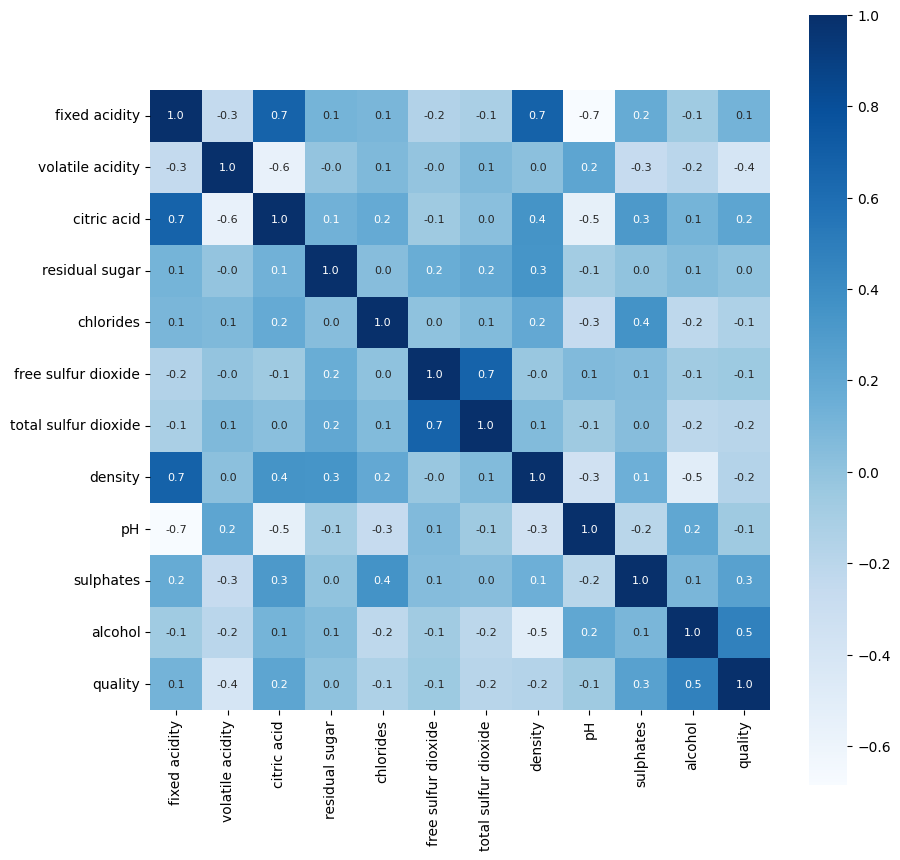

In [93]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True , square = True , fmt = '.1f', annot = True , annot_kws={'size':8},cmap = 'Blues')

<Axes: xlabel='total sulfur dioxide', ylabel='free sulfur dioxide'>

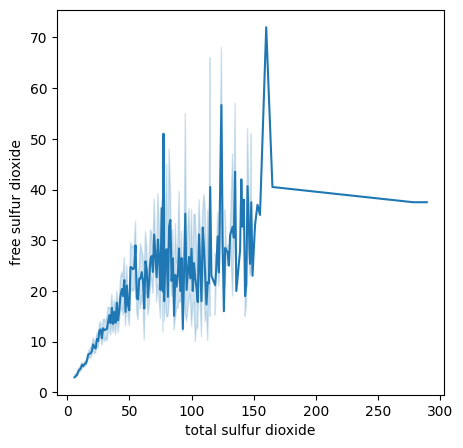

In [94]:
# total sulphur dioxide vs free sulphur dioxide
plot = plt.figure(figsize=(5,5))
sns.lineplot(x='total sulfur dioxide', y = 'free sulfur dioxide', data = wine_dataset)

**Bonus Question**

BAsic Data Exploration

In [95]:
# mean value of citric acid
mean_value = wine_dataset['citric acid'].mean()
print(mean_value)

0.27101478494623654


In [96]:
# Find the minimum value for each column
min_values = wine_dataset.min()

# Find the maximum value for each column
max_values = wine_dataset.max()

# Print the minimum and maximum values
print("Minimum values:\n", min_values)
print("\nMaximum values:\n", max_values)

Minimum values:
 fixed acidity           4.60000
volatile acidity        0.12000
citric acid             0.00000
residual sugar          0.90000
chlorides               0.01200
free sulfur dioxide     1.00000
total sulfur dioxide    6.00000
density                 0.99007
pH                      2.74000
sulphates               0.33000
alcohol                 8.40000
quality                 3.00000
dtype: float64

Maximum values:
 fixed acidity            15.90000
volatile acidity          1.58000
citric acid               1.00000
residual sugar           15.50000
chlorides                 0.61100
free sulfur dioxide      72.00000
total sulfur dioxide    289.00000
density                   1.00369
pH                        4.01000
sulphates                 2.00000
alcohol                  14.90000
quality                   8.00000
dtype: float64


Filtering and Conditional Logic

In [97]:
# Filter wines with pH > 3.5 and alcohol > 10
filtered_wines = wine_dataset[(wine_dataset['pH'] > 3.5) & (wine_dataset['alcohol'] > 10)]

# Calculate the average quality of the filtered wines
average_quality = filtered_wines['quality'].mean()

# Print the average quality
print("Average quality of filtered wines:", average_quality)

Average quality of filtered wines: 5.742857142857143


Grouping and Aggregation

In [98]:
# Group the dataset by 'quality' and calculate mean and median for other columns
quality_stats = wine_dataset.groupby('quality').agg(['mean', 'median'])

# Display the results
print(quality_stats)

        fixed acidity        volatile acidity        citric acid         \
                 mean median             mean median        mean median   
quality                                                                   
3            8.360000   7.50         0.884500  0.845    0.116667   0.02   
4            7.779245   7.50         0.693962  0.670    0.180612   0.09   
5            8.167254   7.80         0.577041  0.580    0.244256   0.23   
6            8.347179   7.90         0.497484  0.490    0.274717   0.26   
7            8.872362   8.80         0.403920  0.370    0.372944   0.40   
8            8.566667   8.25         0.423333  0.370    0.391111   0.42   

        residual sugar        chlorides         ... total sulfur dioxide  \
                  mean median      mean median  ...                 mean   
quality                                         ...                        
3             2.635000    2.1  0.131143  0.097  ...            24.900000   
4             2.6980

Data Cleaning

In [99]:
# Null value
wine_dataset['citric acid'].isnull().sum()

111

In [100]:
# Calculate the mean of the 'citric acid' column (excluding null values)
mean_citric_acid = wine_dataset['citric acid'].mean()

# Replace null values with the mean
wine_dataset['citric acid'] = wine_dataset['citric acid'].fillna(mean_citric_acid)

# Verify that null values have been replaced
print(wine_dataset['citric acid'].isnull().sum())

0


In [101]:
# residual sugar null values
wine_dataset['residual sugar'].isnull().sum()

111

In [102]:
# removing rows with null values
wine_dataset.dropna(subset=['residual sugar'], inplace=True)

#verifying
wine_dataset['residual sugar'].isnull().sum()

0

Normalising Fixed Acidity

In [104]:
min = wine_dataset['fixed acidity'].min()
max = wine_dataset['fixed acidity'].max()
print(min,max)

4.6 15.9


In [105]:
print(wine_dataset['fixed acidity'])
normalise = (wine_dataset['fixed acidity'] - min)/(max - min)
print(normalise)

0        7.4
1        7.8
2        7.8
3       11.2
4        7.4
        ... 
1594     6.2
1595     5.9
1596     6.3
1597     5.9
1598     6.0
Name: fixed acidity, Length: 1488, dtype: float64
0       0.247788
1       0.283186
2       0.283186
3       0.584071
4       0.247788
          ...   
1594    0.141593
1595    0.115044
1596    0.150442
1597    0.115044
1598    0.123894
Name: fixed acidity, Length: 1488, dtype: float64


In [106]:
# removing duplicate rows
wine_dataset.drop_duplicates(inplace=True)

new acidity_ratio column

In [107]:
# create the new column
wine_dataset['acidity_ratio'] = wine_dataset['fixed acidity']/wine_dataset['volatile acidity']

# calculate the mean of new column
mean_acidity_ratio = wine_dataset['acidity_ratio'].mean()

# print the mean
print("Mean acidity ratio", mean_acidity_ratio)

Mean acidity ratio 18.309898278912595


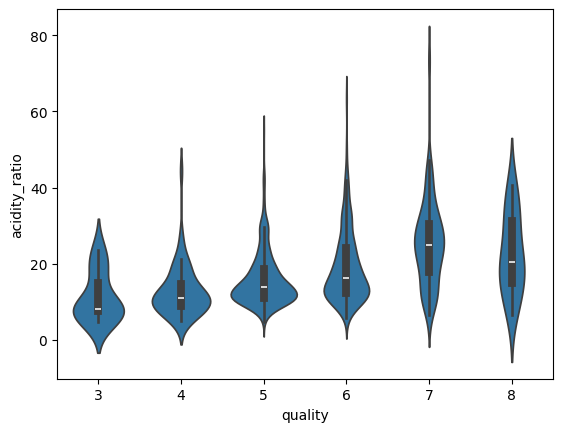

In [108]:
# create the violin plot
sns.violinplot(x='quality', y='acidity_ratio', data=wine_dataset)
plt.show()

In [110]:
# Create the pairplot
sns.pairplot(wine_dataset)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

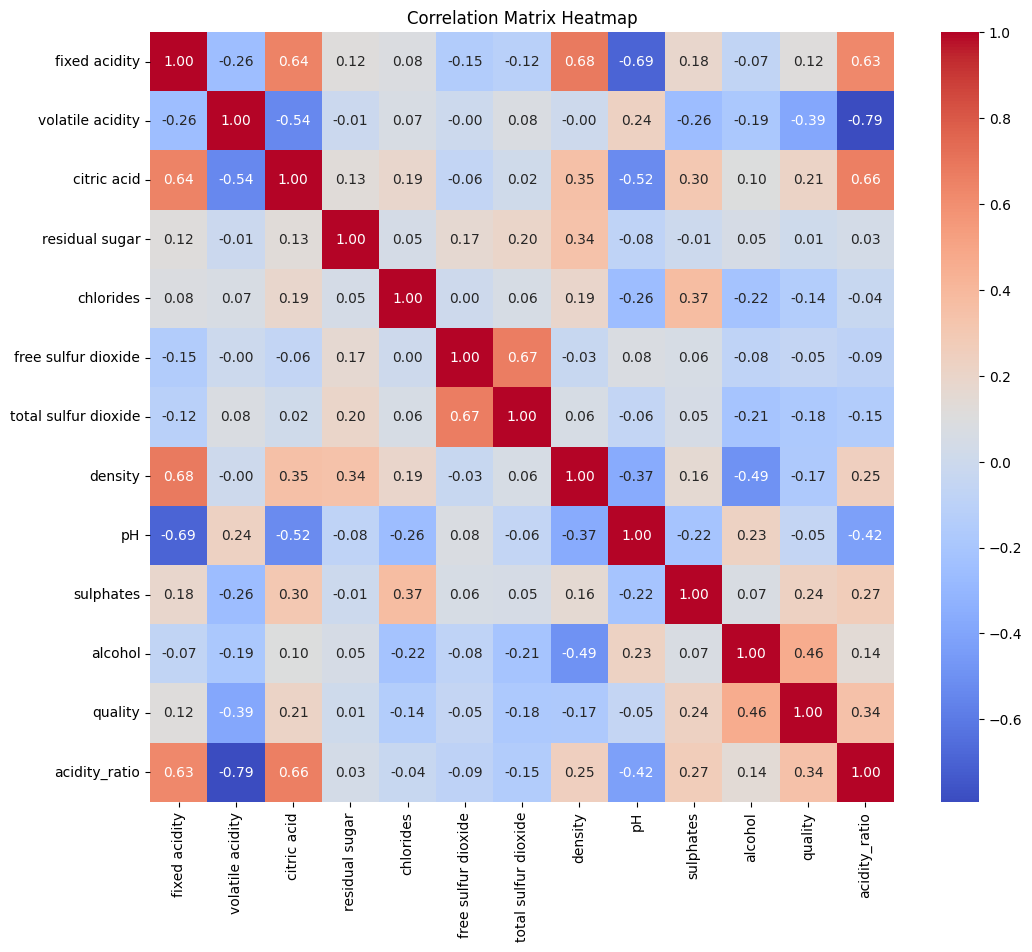

In [111]:
# Calculate the correlation matrix
correlation_matrix = wine_dataset.corr()

# Create the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt = '.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

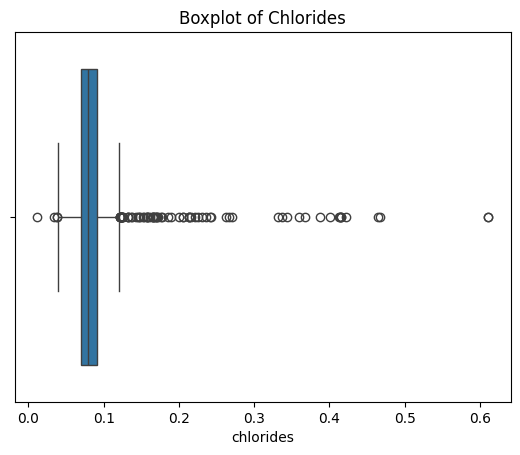

Wines with unusually high chloride values:
       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
14              8.9              0.62     0.180000             3.8      0.176   
15              8.9              0.62     0.271015             3.9      0.170   
17              8.1              0.56     0.280000             1.7      0.368   
38              5.7              1.13     0.090000             1.5      0.172   
42              7.5              0.49     0.200000             2.6      0.332   
...             ...               ...          ...             ...        ...   
1434           10.2              0.54     0.370000            15.4      0.214   
1436           10.0              0.38     0.380000             1.6      0.169   
1474            9.9              0.50     0.271015            13.8      0.205   
1476            9.9              0.50     0.500000            13.8      0.205   
1570            6.4              0.36     0.530000             2.

In [112]:
# Create the boxplot
sns.boxplot(x=wine_dataset['chlorides'])
plt.title("Boxplot of Chlorides")
plt.show()


# Identify outliers
Q1 = wine_dataset['chlorides'].quantile(0.25)
Q3 = wine_dataset['chlorides'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Filter wines with unusually high chloride values
outliers = wine_dataset[wine_dataset['chlorides'] > upper_bound]

# Display the outliers
print("Wines with unusually high chloride values:\n", outliers)